In [1]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ipl-auction-dataset/IPL Data.csv


In [3]:
ipl_data = pd.read_csv("../input/ipl-auction-dataset/IPL Data.csv",engine = 'python')

In [4]:
ipl_data.head()

,S.No,Set No,Set,Name,Country,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s)
0,1,1,BA1,Chris Lynn,NaN,Batsman,41.0,Capped,200,Mumbai Indians,200,KKR,"Deccan Chargers,SRH,KKR"
1,2,1,BA1,Eoin Morgan,NaN,Batsman,52.0,Capped,200,Kolkata Knight Riders,525,NaN,"RCB, KKR, SRH, KXIP"
2,3,1,BA1,Robin Uthappa,NaN,Batsman,177.0,Capped,150,Rajasthan Royals,300,KKR,"MI, RCB, PWI, KKR"
3,4,1,BA1,Jason Roy,NaN,Batsman,8.0,Capped,150,Delhi Capitals,150,NaN,"GL,DD"
4,5,1,BA1,Aaron Finch,NaN,Batsman,75.0,Capped,100,Royal Challengers Bangalore,440,NaN,"RR, DD, PWI, SRH, MI, GL, KXIP"


In [5]:
ipl_data.describe()

,S.No,Country,IPL Matches,Reserve Price(in ₹ Lacs),Auctioned Price(in ₹ Lacs)
count,62.000000,0.0,38.000000,62.000000,62.000000
mean,31.500000,NaN,35.552632,69.032258,226.290323
std,18.041619,NaN,43.325105,62.001049,311.463936
min,1.000000,NaN,0.000000,20.000000,20.000000
25%,16.250000,NaN,3.250000,20.000000,20.000000
50%,31.500000,NaN,17.000000,50.000000,90.000000
75%,46.750000,NaN,61.000000,100.000000,285.000000
max,62.000000,NaN,177.000000,200.000000,1550.000000


In [6]:
ipl_data.shape

(62, 13)

In [7]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S.No                          62 non-null     int64  
 1   Set No                        62 non-null     object 
 2   Set                           62 non-null     object 
 3   Name                          62 non-null     object 
 4   Country                       0 non-null      float64
 5   Playing Role                  62 non-null     object 
 6   IPL Matches                   38 non-null     float64
 7   Capped / Uncapped /Associate  62 non-null     object 
 8   Reserve Price(in ₹ Lacs)      62 non-null     int64  
 9   IPL 2020 Team                 62 non-null     object 
 10  Auctioned Price(in ₹ Lacs)    62 non-null     int64  
 11  IPL 2019 Team                 17 non-null     object 
 12  IPL Team(s)                   36 non-null     object 
dtypes: floa

In [8]:
ipl_data.drop(['S.No','Country'], axis=1, inplace=True)

In [9]:
ipl_data.head()

,Set No,Set,Name,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s)
0,1,BA1,Chris Lynn,Batsman,41.0,Capped,200,Mumbai Indians,200,KKR,"Deccan Chargers,SRH,KKR"
1,1,BA1,Eoin Morgan,Batsman,52.0,Capped,200,Kolkata Knight Riders,525,NaN,"RCB, KKR, SRH, KXIP"
2,1,BA1,Robin Uthappa,Batsman,177.0,Capped,150,Rajasthan Royals,300,KKR,"MI, RCB, PWI, KKR"
3,1,BA1,Jason Roy,Batsman,8.0,Capped,150,Delhi Capitals,150,NaN,"GL,DD"
4,1,BA1,Aaron Finch,Batsman,75.0,Capped,100,Royal Challengers Bangalore,440,NaN,"RR, DD, PWI, SRH, MI, GL, KXIP"


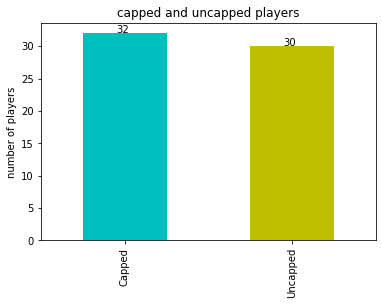

In [10]:
cap_count  = ipl_data['Capped / Uncapped /Associate'].value_counts()
ax = cap_count.plot(kind='bar', color=['c','y'])
ax.set_ylabel('number of players')
ax.set_title('capped and uncapped players')
x_offset = -0.05
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [11]:
pd.DataFrame(ipl_data.groupby(["Playing Role", "Capped / Uncapped /Associate"]).size().rename('Freq'))

Freq
Playing Role  Capped / Uncapped /Associate      
All Rounder   Capped                          13
              Uncapped                        13
Batsman       Capped                           8
              Uncapped                         4
Bowler        Capped                           3
              Uncapped                         2
Fast Bowler   Capped                           5
              Uncapped                         4
Spinner       Capped                           2
              Uncapped                         2
Wicket Keeper Capped                           1
              Uncapped                         5

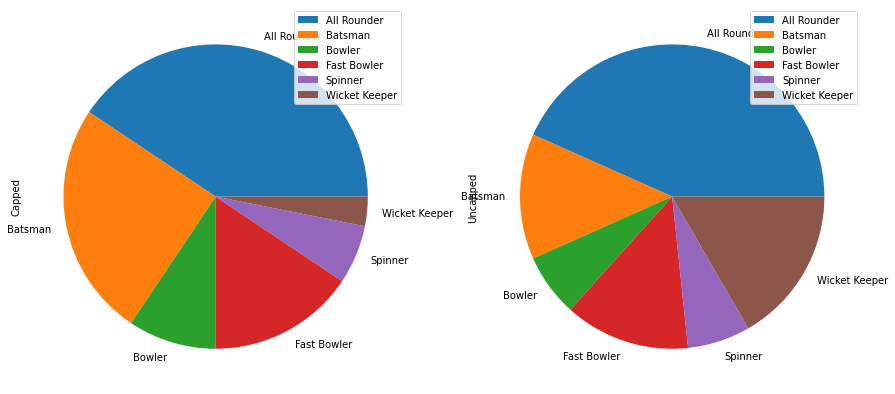

In [12]:
# plot data
# fig, ax = plt.subplots(figsize=(15,7))
# fig.tight_layout()
# use unstack()
ipl_data.groupby(["Playing Role", "Capped / Uncapped /Associate"]).size().rename('Freq').unstack().plot(kind='pie',figsize=(15,7),subplots=True)

# type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [13]:
df = ipl_data[ipl_data['IPL Matches']==ipl_data['IPL Matches'].max()]
print("Player who has played highest IPL matches")
df[['Name', 'Playing Role', 'IPL Matches']].style.hide_index()

Player who has played highest IPL matches


Name,Playing Role,IPL Matches
Robin Uthappa,Batsman,177.000000


In [14]:
print("Number of players making Debut in IPL")
debut_df = ipl_data[ipl_data['IPL Team(s)'].isnull() & ipl_data['IPL 2019 Team'].isnull()]
debut_df.Name.count()

Number of players making Debut in IPL


26

In [15]:
print("All the players making Debut in IPL")
debut_df[['Name']].style.hide_index()

All the players making Debut in IPL


Name
Alex Carey
Sheldon Cottrell
Virat Singh
Priyam Garg
Yashasvi Jaiswal
Anuj Rawat
Akash Singh
Kartik Tyagi
Ishan Porel
M Siddharth


In [16]:
print("Number of players who played IPL before 2019 and re-selected in 2020")
df_20 = ipl_data[ipl_data['IPL Team(s)'].notnull() & ipl_data['IPL 2019 Team'].isnull()]
df_20.Name.count()

Number of players who played IPL before 2019 and re-selected in 2020


19

In [17]:
print("All the players making Debut in IPL")
df_20[['Name']].style.hide_index()

All the players making Debut in IPL


Name
Eoin Morgan
Jason Roy
Aaron Finch
Glenn Maxwell
Chris Woakes
Pat Cummins
Saurabh Tiwary
Mitchell Marsh
James Neesham
Josh Hazlewood


In [18]:
df = ipl_data[ipl_data['Auctioned Price(in ₹ Lacs)']==ipl_data['Auctioned Price(in ₹ Lacs)'].max()]
print("Highest Paid player")
df[['Name', 'Playing Role','IPL 2020 Team', 'Auctioned Price(in ₹ Lacs)']].style.hide_index()

Highest Paid player


Name,Playing Role,IPL 2020 Team,Auctioned Price(in ₹ Lacs)
Pat Cummins,All Rounder,Kolkata Knight Riders,1550


In [19]:
uncapped_df = ipl_data[ipl_data['Capped / Uncapped /Associate'] == 'Uncapped']
uncapped_df = uncapped_df[uncapped_df['Auctioned Price(in ₹ Lacs)']==uncapped_df['Auctioned Price(in ₹ Lacs)'].max()]
print("Highest uncapped player")
uncapped_df[['Name', 'Playing Role','IPL 2020 Team', 'Auctioned Price(in ₹ Lacs)']].style.hide_index()

Highest uncapped player


Name,Playing Role,IPL 2020 Team,Auctioned Price(in ₹ Lacs)
Varun Chakravarthy,All Rounder,Kolkata Knight Riders,400


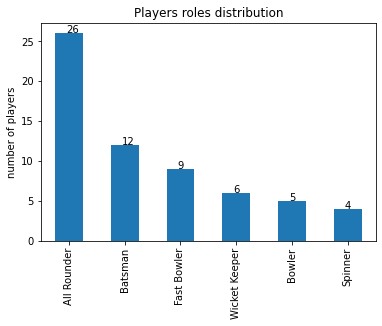

In [20]:
role_count = ipl_data['Playing Role'].value_counts()
ax = role_count.plot(kind='bar')
ax.set_ylabel('number of players')
ax.set_title('Players roles distribution')
x_offset = -0.05
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [21]:
ipl_data.head()

,Set No,Set,Name,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s)
0,1,BA1,Chris Lynn,Batsman,41.0,Capped,200,Mumbai Indians,200,KKR,"Deccan Chargers,SRH,KKR"
1,1,BA1,Eoin Morgan,Batsman,52.0,Capped,200,Kolkata Knight Riders,525,NaN,"RCB, KKR, SRH, KXIP"
2,1,BA1,Robin Uthappa,Batsman,177.0,Capped,150,Rajasthan Royals,300,KKR,"MI, RCB, PWI, KKR"
3,1,BA1,Jason Roy,Batsman,8.0,Capped,150,Delhi Capitals,150,NaN,"GL,DD"
4,1,BA1,Aaron Finch,Batsman,75.0,Capped,100,Royal Challengers Bangalore,440,NaN,"RR, DD, PWI, SRH, MI, GL, KXIP"


In [22]:
ipl_data["IPL Team(s)"].fillna(" ", inplace = True)
ipl_data['Total Teams played'] = [len(x.split(',')) for x in ipl_data['IPL Team(s)'].tolist()]

In [23]:
# selecting only non-debut players for 2020 IPL
single_match_df = ipl_data[~ipl_data.isin(debut_df)].dropna()
single_match_df.head()

,Set No,Set,Name,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s),Total Teams played
0,1,BA1,Chris Lynn,Batsman,41.0,Capped,200.0,Mumbai Indians,200.0,KKR,"Deccan Chargers,SRH,KKR",3
2,1,BA1,Robin Uthappa,Batsman,177.0,Capped,150.0,Rajasthan Royals,300.0,KKR,"MI, RCB, PWI, KKR",4
8,2,AL1,Sam Curran,All Rounder,16.0,Capped,100.0,Chennai Super Kings,550.0,KXIP,KXIP,1
9,2,AL1,Chris Morris,All Rounder,61.0,Capped,150.0,Royal Challengers Bangalore,1000.0,DC,"CSK,RR,DC",3
11,4,FA1,Jaydev Unadkat,Fast Bowler,73.0,Capped,100.0,Rajasthan Royals,300.0,RR,"KKR, RCB, DD,RPS,RR",5


In [24]:
print("players who had played for only one franchise before IPL 2020")
one_df = single_match_df[single_match_df['Total Teams played'] == 1]
one_df[['Name', 'Playing Role','IPL 2020 Team']].style.hide_index()

players who had played for only one franchise before IPL 2020


Name,Playing Role,IPL 2020 Team
Sam Curran,All Rounder,Chennai Super Kings
Varun Chakravarthy,All Rounder,Kolkata Knight Riders
Shimron Hetmyer,Batsman,Delhi Capitals
David Miller,Batsman,Rajasthan Royals
Oshane Thomas,Fast Bowler,Rajasthan Royals
Prab Simran Singh,Wicket Keeper,Kings XI Punjab
